# Deep Learning

## 1. Packages

* numpy is the fundamental package for scientific computation with Python.
* matplotlib is a robust library for generating graphs in Python.

In [1]:
# Importing libraries
# Python imports
# Allow matplotlib to plot inside this notebook
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Print versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.5.5
numpy: 1.11.3
matplotlib: 2.2.2


## 2. Dataset

### Config Dataset

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D))
y = np.zeros((N*K), dtype='uint8')

In [3]:
print(X.shape)

(300, 2)


In [4]:
print(y.shape)

(300,)


### Visualize Dataset

(-1, 1)

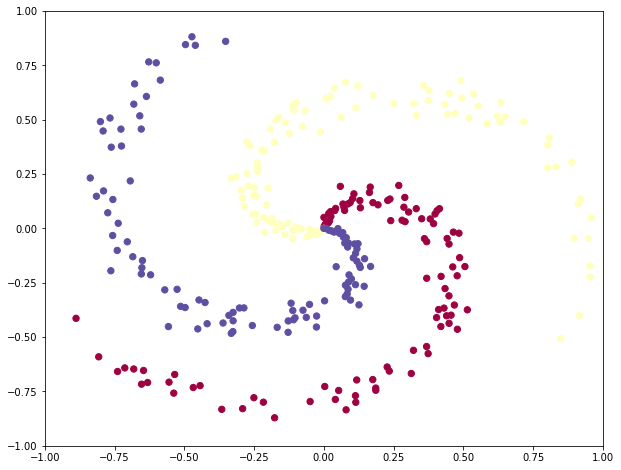

In [5]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'

np.random.seed(0)

# Generating the datast
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [61]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

## 3 - General Architecture of the learning algorithm ##

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.


### 4.1 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation

In [7]:
def initialize_with_zeros(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)

    
    ### END CODE HERE ###
    
    return W, b

In [8]:
W_debug, b_debug = initialize_with_zeros(D, K)
print ("W = " + str(W_debug))
print ("b = " + str(b_debug))

W = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b = [[ 0.  0.  0.]]


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.  0. 0.]
 [ 0.  0. 0.]] 
        </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> [[ 0.] 
            [ 0.] 
            [ 0.]]
        </td>
    </tr>
</table>


In [9]:
def initialize_randomly(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)

    
    ### END CODE HERE ###
    
    return W, b

In [10]:
def initialize_randomly_norm(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)

    
    ### END CODE HERE ###
    
    return W, b

In [11]:
def initialize_he(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 1 line of code)

    
    ### END CODE HERE ###
    
    return W, b

In [12]:
def initialize_params(D, K, init_type='random'):
    if init_type == 'zeros':
        print('zero-based init')
        return initialize_with_zeros(D, K)
    elif init_type == 'random':
        print('random-based init')
        return initialize_randomly(D, K)
    elif init_type == 'randomnorm':
        print('randomnorm-based init')
        return initialize_randomly_norm(D, K)
    elif init_type == 'he':
        print('he-based init')
        return initialize_he(D, K)

### 4.2 - Activation Functions

**Sigmoid Function**: it takes a real-valued number and “squashes” it into range between 0 and 1. In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically since it has a nice interpretation as the firing rate of a neuron: from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1).

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ to make predictions. Use np.exp().

In [13]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)

    ### END CODE HERE ###
    
    return s

In [14]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

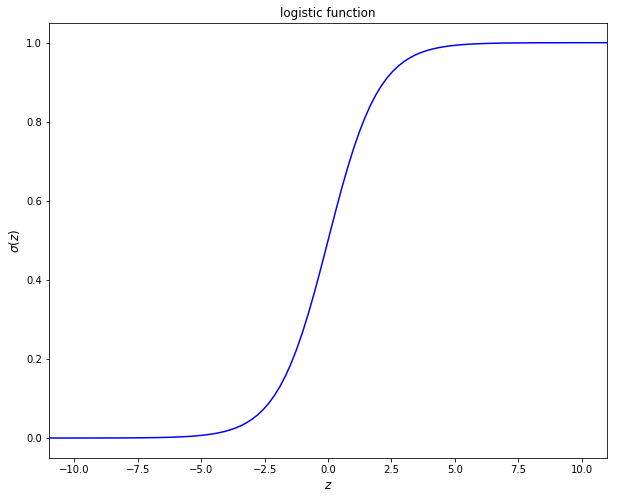

In [15]:
# Plot the logistic function
xval=11
no_samp=100
z = np.linspace(-xval, xval, no_samp)
plt.plot(z, sigmoid(z), 'b-')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$\sigma(z)$', fontsize=12)
plt.title('logistic function')
plt.xlim(-xval, xval)
plt.show()
#

**Exercise**: Using your code from "Python Basics", implement `sigmoid_deriv()` to compute the derivative of the sigmoid function.

In [16]:
def sigmoid_deriv(z):
    """
    Compute the derivative of the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid_deriv(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)

    ### END CODE HERE ###
    
    return s

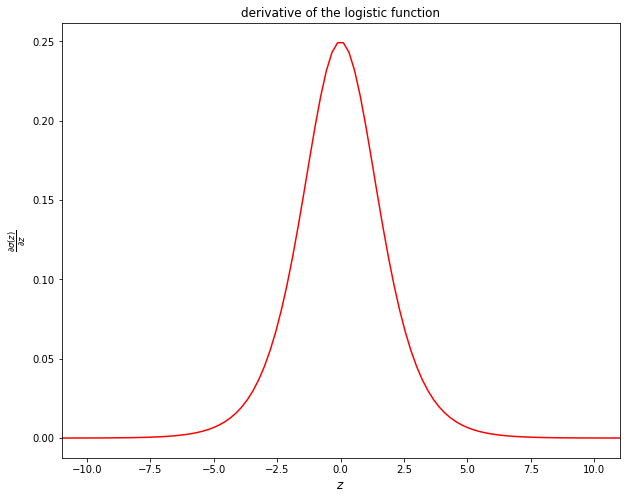

In [17]:
# Plot the derivative of the logistic function
xval=11
no_samp=100
z = np.linspace(-xval, xval, no_samp)
plt.plot(z, sigmoid_deriv(z), 'r-')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=12)
plt.title('derivative of the logistic function')
plt.xlim(-xval, xval)
plt.show()
#

**Softmax Function**: it takes an N-dimensional vector of real numbers and transforms it into a vector of real number in range (0,1) which add upto 1:

$$p_i = \frac{e^{a_i}}{\sum_{k=1}^N e^a_k}$$

Due to the desirable property of softmax function outputting a probability distribution, we usually use it as the final layer in neural networks. 

**Exercise**: Using your code from "Python Basics", implement `softmax()`.

In [18]:
def softmax(z):
    ### START CODE HERE ### (≈ 2 lines of code)

    
    ### END CODE HERE ###

**Note**: For the exponential function its not difficult to overshoot the limit of float64 whose upper bound is $10^{308}$. We can therefore multiply the numerator and denominator with a constant C:

\begin{align}
p_i &= \frac{e^{a_i}}{\sum_{k=1}^N e^{a_k}} \\
&= \frac{Ce^{a_i}}{C\sum_{k=1}^N e^{a_k}} \\
&= \frac{e^{a_i + \log(C)}}{\sum_{k=1}^N e^{a_k + \log(C)}} \\
\end{align}

We can choose an arbitrary value for $log(C)$ term, but generally $log(C)=−max(a)$ is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity

In [19]:
def stable_softmax(z):
    ### START CODE HERE ### (≈ 2 lines of code)

    
    ### END CODE HERE ###

#### Derivative of Softmax
In order to use the Softmax function as output layer on a NN, we need to calculate the derivative or gradient and pass it back to the previous layer during backpropagation:

\begin{align}
\frac{\partial p_i}{\partial a_j} &= \frac{\partial  \frac{e^{a_i}}{\sum_{k=1}^N e^{a_k}}}{\partial a_j} \\
\end{align}

From quotient rule we know that for $f(x) = \frac{g(x)}{h(x)}$, we obtain:

$$f^\prime(x) = \frac{ g\prime(x)h(x) - h\prime(x)g(x)}{h(x)^2}$$

In our case $g(x) = e^{a_i}$ and $h(x) = \sum_{k=1}^ N e^{a_k}$. In $h(x)$, $\frac{\partial}{\partial e^{a_j}}$ will always be $e^{a_j}$ as it will always have $e^{a_j}$. But we have to note that in $g(x)$, $\frac{\partial}{\partial e^{a_j}}$ will be $e^{a_j}$ only if $i=j$, otherwise $0$.

If $i=j$
\begin{align}
\frac{\partial  \frac{e^{a_i}}{\sum_{k=1}^N e^{a_k}}}{\partial a_j}&= \frac{e^{a_i} \sum_{k=1}^N e^{a_k} - e^{a_j}e^{a_i}}{\left( \sum_{k=1}^N e^{a_k}\right)^2} \\
&= \frac{e^{a_i} \left( \sum_{k=1}^N e^{a_k} - e^{a_j}\right )}{\left( \sum_{k=1}^N e^{a_k}\right)^2} \\
&= \frac{ e^{a_j} }{\sum_{k=1}^N e^{a_k} } \times \frac{\left( \sum_{k=1}^N e^{a_k} - e^{a_j}\right ) }{\sum_{k=1}^N e^{a_k} } \\
&= p_i(1-p_j)
\end{align}

If $i\neq j$
\begin{align}
\frac{\partial  \frac{e^{a_i}}{\sum_{k=1}^N e^{a_k}}}{\partial a_j}&= \frac{0 - e^{a_j}e^{a_i}}{\left( \sum_{k=1}^N e^{a_k}\right)^2} \\
&= \frac{- e^{a_j} }{\sum_{k=1}^N e^{a_k} } \times \frac{e^{a_i} }{\sum_{k=1}^N e^{a_k} } \\
&= - p_j.p_i
\end{align}

So the derivative of the softmax function is defined as:

$$\frac{\partial p_i}{\partial a_j} = \begin{cases}p_i(1-p_j) &  if & i=j \\
-p_j.p_i & if & i \neq j
\end{cases}$$

Or using Kronecker delta $\delta{ij} = \begin{cases} 1 & if & i=j \\ 0 & if & i\neq j \end{cases}$

$$\frac{\partial p_i}{\partial a_j} =  p_i(\delta_{ij}-p_j)$$



### 4.3 - Cost Function
We’ll use cross-entropy for our cost function. The formula for a single training example is:
    
$$
L(y, \hat{y}) = y^{(i)} \log(\hat{y}^{(i)})
$$

Averaging over a training set of $𝑚$ examples we then have:
    
$$
L(Y, \hat{Y}) = -\frac{1}{m} \sum_{i=1}^m y^{(i)} \log(\hat{y}^{(i)})
$$

Cross-entropy is used when node activations can be understood as representing the probability that each hypothesis might be true, i.e. when the output is a probability distribution.


**Exercise**: Using your code from "Python Basics", implement `cost_function()`, which implements the \textit{cross_entropy} loss function.

In [20]:
def compute_cost(y, y_hat):
    """
    y_hat is the predictions(1 x num_samples)
    y is labels (1 x num_samples)
    """
    ### START CODE HERE ### (≈ 3 lines of code)

    
    ### END CODE HERE ###
    return L

### 4.4 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.


For backpropagation, we will need to know how $𝐿$ changes with respect to each component $w_j$ of $w$. That is, we must compute each $\partial L / \partial w_j$

\begin{align}
  z &= w^T x + b,\newline
  \hat{y} &= softmax(z),\newline
  L(y, \hat{y}) &= -y \log(\hat{y})
\end{align}


### Derivative of the Cross Entropy Loss with Softmax

Cross Entropy Loss with Softmax function are used as the output layer extensively. Now we use the derivative of softmax [1] that we derived earlier to derive the derivative of the cross entropy loss function.
\begin{align}
L &= - \sum_i y_i log(p_i) \\
\frac{\partial L}{\partial o_i} &= - \sum_k y_k \frac{\partial log(p_k)}{\partial o_i } \\
&= - \sum_k y_k \frac{\partial log(p_k)}{\partial p_k} \times \frac{\partial p_k}{ \partial o_i} \\
&= - \sum y_k \frac{1}{p_k} \times \frac{\partial p_k}{\partial o_i}
\end{align}

From derivative of softmax we derived earlier:
\begin{align}
\frac{\partial L}{\partial o_i}  &= -y_i(1-p_i) - \sum_{k\neq i} y_k \frac{1}{p_k}(-p_k.p_i) \\
&= -y_i(1-p_i) + \sum_{k \neq 1} y_k.p_i \\
&= - y_i + y_ip_i + \sum_{k \neq 1} y_k.p_i \\
&= p_i\left( y_i +  \sum_{k \neq 1} y_k\right) - y_i \\
&= p_i\left( y_i +  \sum_{k \neq 1} y_k\right)  - y_i
\end{align}

In [21]:
def delta_cross_entropy(y, y_hat):    
    ### START CODE HERE ### (≈ 4 lines of code)

    
    ### END CODE HERE ###

In [22]:
def propagate(W, b, X, y, use_reg=False, reg_lambda=0.01):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    W -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dW -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[0]
    num_examples = X.shape[0]
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 3 lines of code)

    
    ### END CODE HERE ###
    
    if use_reg:
        reg_cost = 0.5 * reg_lambda * np.sum(W*W)
        cost = cost + reg_cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 3 lines of code)

    
    
    ### END CODE HERE ###
    
    if use_reg:
        dW += reg_lambda*W 

    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

### 4.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [23]:
def optimize(W, b, X, y, num_iterations, learning_rate, use_reg = False, reg_lambda = 0.01, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    use_reg -- use regularization
    reg_lambda -- regularization weight
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for ii in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 

        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dW = grads["dW"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###

        
        ### END CODE HERE ###
        
        # Record the costs
        if ii % 10 == 0:
            costs.append(cost)
        
        # Print the cost every 200 training iterations
        if print_cost and ii % 10 == 0:
            print ("Cost after iteration %i: %f" %(ii, cost))
    
    params = {"W": W,
              "b": b}
    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

In [24]:
def predict(W, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)

    ### END CODE HERE ###
    
    predicted_class = np.argmax(scores, axis=1)
    
    assert(predicted_class.shape == (m,))
    
    return predicted_class

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [25]:
def train(X_train, y_train, K=3, num_iterations=2000, learning_rate=0.5, use_reg=False, reg_lambda=0.01, init_type='random', print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    ### START CODE HERE ### 

    ### END CODE HERE ###

    # Gradient descent (≈ 1 line of code)
    ### START CODE HERE ###

    
    ### END CODE HERE ###
   
    # Retrieve parameters w and b from dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
    
    # prediction (≈ 1 line of code)
    ### START CODE HERE ###
    Y_prediction_train = ...
    ### END CODE HERE ###
    
    # Print train/test Errors
    print('training accuracy: %.2f' % (np.mean(Y_prediction_train == y)))
    
    d = {"costs": costs,
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [26]:
d =  train(X, y, K=3, num_iterations=300, learning_rate= 1e-0, use_reg=True, reg_lambda=1e-3, print_cost=True)

random-based init
Cost after iteration 0: 1.096919
Cost after iteration 10: 0.917310
Cost after iteration 20: 0.851535
Cost after iteration 30: 0.822352
Cost after iteration 40: 0.807594
Cost after iteration 50: 0.799452
Cost after iteration 60: 0.794683
Cost after iteration 70: 0.791765
Cost after iteration 80: 0.789921
Cost after iteration 90: 0.788726
Cost after iteration 100: 0.787937
Cost after iteration 110: 0.787408
Cost after iteration 120: 0.787049
Cost after iteration 130: 0.786803
Cost after iteration 140: 0.786633
Cost after iteration 150: 0.786514
Cost after iteration 160: 0.786431
Cost after iteration 170: 0.786373
Cost after iteration 180: 0.786331
Cost after iteration 190: 0.786302
Cost after iteration 200: 0.786281
Cost after iteration 210: 0.786267
Cost after iteration 220: 0.786256
Cost after iteration 230: 0.786249
Cost after iteration 240: 0.786243
Cost after iteration 250: 0.786239
Cost after iteration 260: 0.786237
Cost after iteration 270: 0.786235
Cost after it

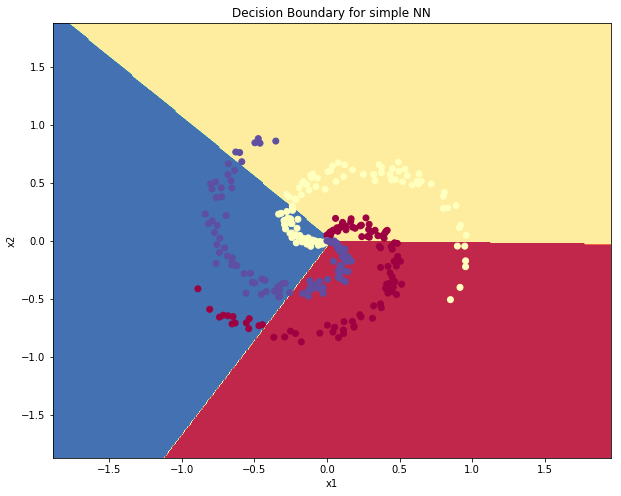

In [27]:
W = d['W']
b = d['b']
plt.title("Decision Boundary for simple NN")
plot_decision_boundary(lambda X: predict(W, b, X), X.T, y.T)

## 6 - Merge all functions into a model ##

In [72]:
def propagate_two_layer(W1, b1, W2, b2, X, y, use_reg=False, reg_lambda=0.01):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    W -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dW -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[0]
    num_examples = X.shape[0]
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 5 lines of code), one hidden layer, first layer with RELU, activation: softmax

    
    
    
    
    ### END CODE HERE ###
    
    if use_reg:
        ### START CODE HERE ###  (≈ 2 add regularization here)
        ...
        ...
        ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 3 lines of code)
    

  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = ...
    db2 = ...
    
    # next backprop into hidden layer
    dhidden = ...
  
    # backprop the ReLU non-linearity
    ...
    
    # finally backprop into parameters W1 and b1
    dW1 =  ...
    db1 =  ...
    ### END CODE HERE ###
    
    if use_reg:
        ### START CODE HERE ###  (≈ 2 add backprop regularization here)
        dW1 += ...
        dW2 += ...
        ### END CODE HERE ###

    assert(dW1.shape == W1.shape)
    assert(db1.dtype == float)
    assert(dW2.shape == W2.shape)
    assert(db2.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads, cost

In [73]:
def optimize_two_layer(W1, b1, W2, b2, X, y, num_iterations, learning_rate, use_reg = False, reg_lambda = 0.01, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    use_reg -- use regularization
    reg_lambda -- regularization weight
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for ii in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 

        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        
        # update rule (≈ 4 lines of code)
        ### START CODE HERE ###
        W1 = ...
        b1 = ...
        W2 = ...
        b2 = ...
        ### END CODE HERE ###
        
        # Record the costs
        if ii % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 200 training iterations
        if print_cost and ii % 100 == 0:
            print ("Cost after iteration %i: %f" %(ii, cost))
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return params, grads, costs

In [74]:
def predict_two_layer(W1, b1, W2, b2, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 3 lines of code)

    
    

    ### END CODE HERE ###
    
    predicted_class = ...
    
    assert(predicted_class.shape == (m,))
    
    return predicted_class

In [75]:
def train_two_layer(X_train, y_train, K=3, h_neurons=100, num_iterations=2000, learning_rate=0.5, use_reg=False, reg_lambda=0.01, init_type='random', print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 2 lines of code)
    W1, b1 = ...
    W2, b2 = ...

    # Gradient descent (≈ 1 line of code)
    ...
    
    # Retrieve parameters w and b from dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Y_prediction_train = ...
    
    # Print train/test Errors
    print('training accuracy: %.2f' % (np.mean(Y_prediction_train == y)))
    
    d = {"costs": costs,
         "W1" : W1, 
         "b1" : b1,
         "W2" : W2, 
         "b2" : b2,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [76]:
d =  train_two_layer(X, y, K=3,  h_neurons=100, num_iterations=3000, learning_rate= 1e-0, use_reg=True, reg_lambda=1e-3, print_cost=True)

random-based init
random-based init
Cost after iteration 0: 1.098782
Cost after iteration 100: 0.719103
Cost after iteration 200: 0.723514
Cost after iteration 300: 0.663791
Cost after iteration 400: 0.414536
Cost after iteration 500: 0.378575
Cost after iteration 600: 0.362849
Cost after iteration 700: 0.346373
Cost after iteration 800: 0.323276
Cost after iteration 900: 0.310680
Cost after iteration 1000: 0.297677
Cost after iteration 1100: 0.287132
Cost after iteration 1200: 0.277655
Cost after iteration 1300: 0.279178
Cost after iteration 1400: 0.271069
Cost after iteration 1500: 0.267166
Cost after iteration 1600: 0.264247
Cost after iteration 1700: 0.261671
Cost after iteration 1800: 0.259553
Cost after iteration 1900: 0.257770
Cost after iteration 2000: 0.256176
Cost after iteration 2100: 0.254729
Cost after iteration 2200: 0.253403
Cost after iteration 2300: 0.252155
Cost after iteration 2400: 0.251092
Cost after iteration 2500: 0.250193
Cost after iteration 2600: 0.249466
Cost

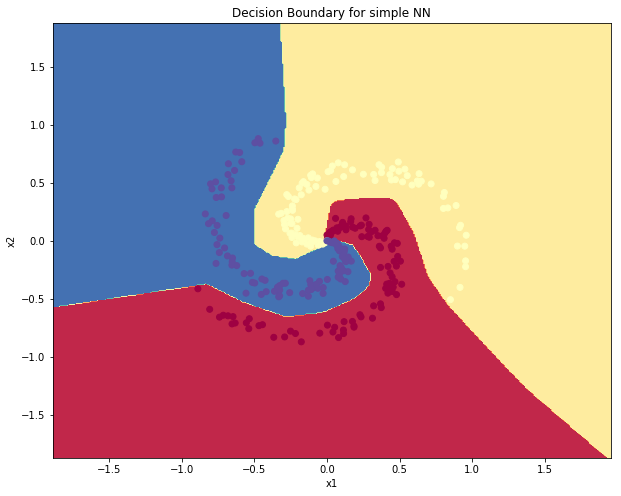

In [77]:
W1 = d['W1']
b1 = d['b1']
W2 = d['W2']
b2 = d['b2']
plt.title("Decision Boundary for simple NN")
plot_decision_boundary(lambda X: predict_two_layer(W1, b1, W2, b2, X), X.T, y.T)

## Varying the no. of neurons in the hidden layer

random-based init
random-based init
training accuracy: 0.49
random-based init
random-based init
training accuracy: 0.60
random-based init
random-based init
training accuracy: 0.65
random-based init
random-based init
training accuracy: 0.61
random-based init
random-based init
training accuracy: 0.62
random-based init
random-based init
training accuracy: 0.97
random-based init
random-based init
training accuracy: 0.97
random-based init
random-based init
training accuracy: 0.98
random-based init
random-based init
training accuracy: 0.98


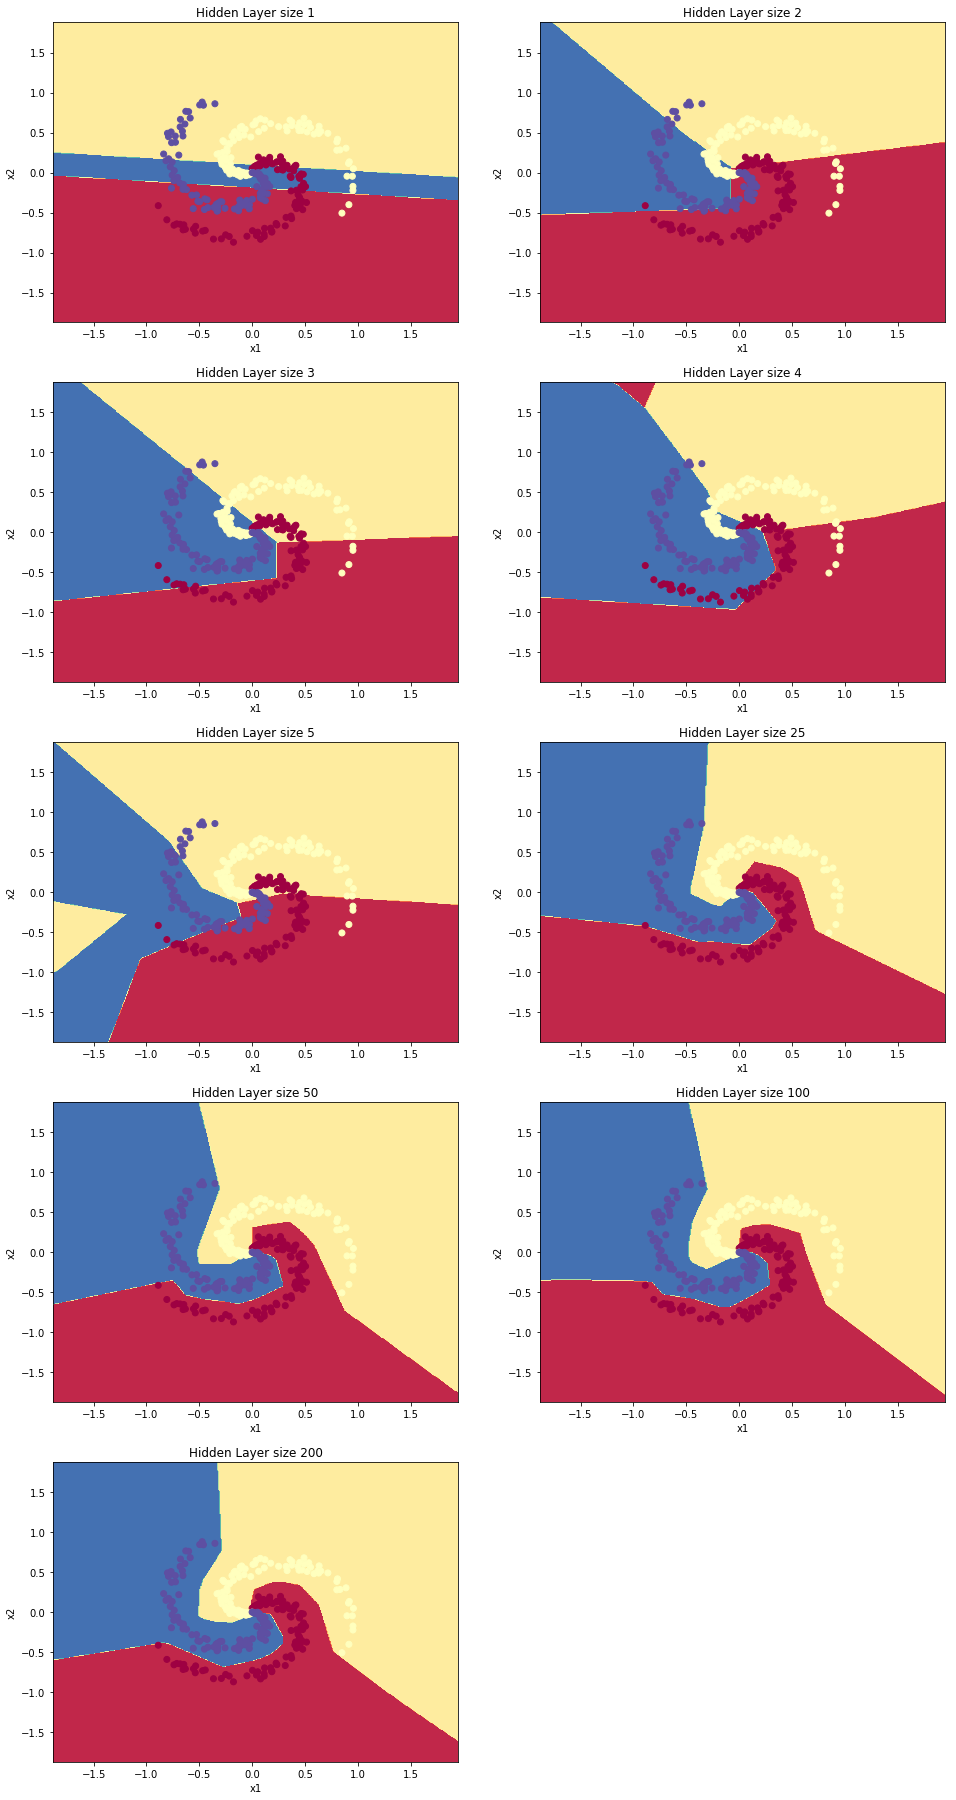

In [79]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 25, 50, 100, 200]
for ii, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, ii+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = ...
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    plot_decision_boundary(lambda X: predict_two_layer(W1, b1, W2, b2, X), X.T, y.T)
plt.show()

## Changing the learning rate for gradient descent

random-based init
random-based init
training accuracy: 0.96
random-based init
random-based init
training accuracy: 0.76
random-based init
random-based init
training accuracy: 0.51
random-based init
random-based init
training accuracy: 0.53
random-based init
random-based init
training accuracy: 0.37


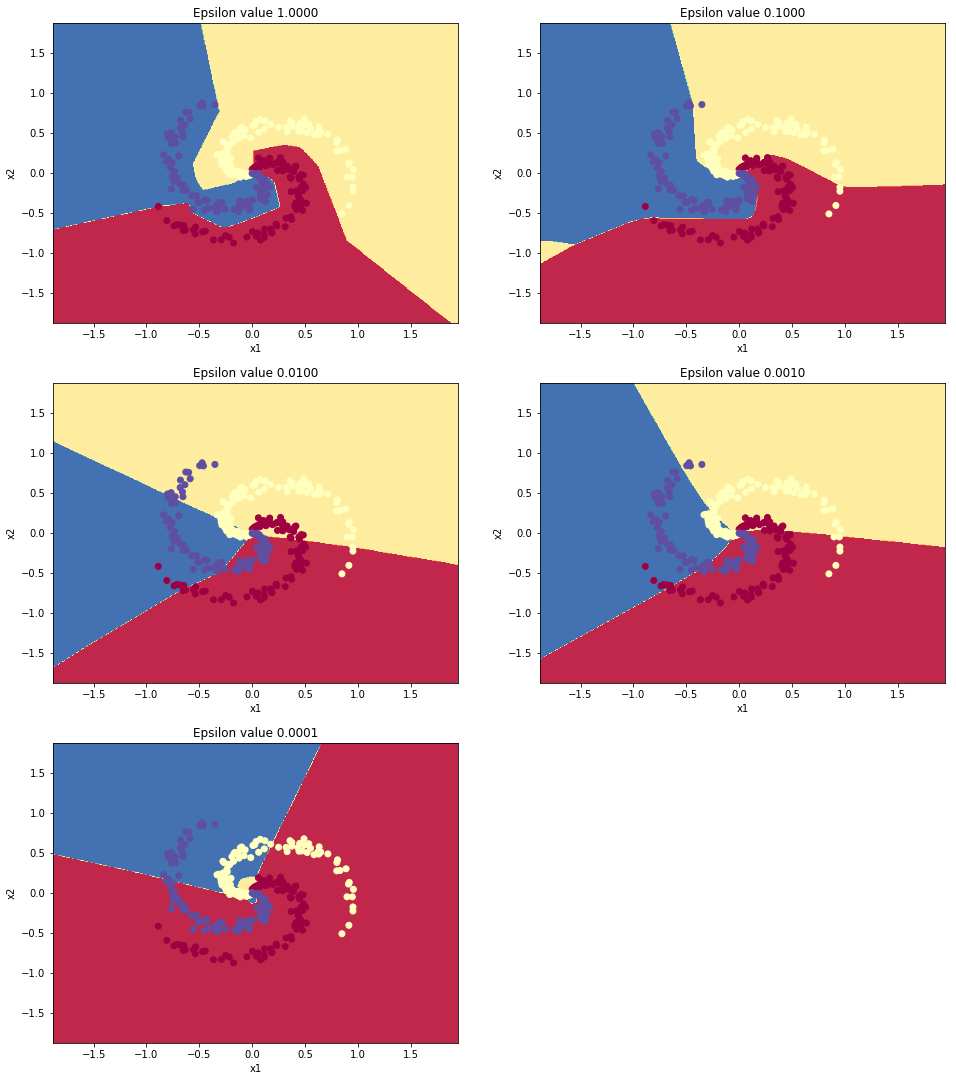

In [80]:
plt.figure(figsize=(16, 32))
epsilon_steps = [1.0, 0.1, 0.01, 0.001, 0.0001]
for ii, epsilon_st in enumerate(epsilon_steps):
    plt.subplot(5, 2, ii+1)
    plt.title('Epsilon value %2.4f' % epsilon_st)
    model = ...
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    plot_decision_boundary(lambda X: predict_two_layer(W1, b1, W2, b2, X), X.T, y.T)
plt.show()